In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(10027, 28)
(10027, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RR supports
idxs = np.where(X_relative_footsteps_continuous[:, 24] == 0)[0]
X_relative_footsteps_continuous_RR_support = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_RR_support = Y_relative_footsteps_continuous[idxs]

## Predict RR foot -> x

In [8]:
X_relative_footsteps_continuous_RR_support.shape

(5022, 28)

In [9]:
X_relative_footsteps_continuous_RR_support[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.06422444,  0.12709958,
        0.02129842,  0.03284169,  0.00745874, -0.01805852,  0.23490033,
        0.18683081, -0.40515856,  0.23261811, -0.20303247, -0.40508065,
       -0.26129142,  0.13343325, -0.40023591, -0.24991612, -0.15232612,
       -0.40053536,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [10]:
Y_relative_footsteps_continuous_RR_support[0, :]

array([ 0.21954448,  0.20866495,  0.24175469, -0.18419152, -0.24350115,
        0.15491923, -0.27453524, -0.12738613])

### Linear Regression

In [14]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RR_support[:, :3], # motion command
               X_relative_footsteps_continuous_RR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RR_support[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_RR_support[:, 6]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_support_x = LinearRegression()

# Fit the model
model_rr_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.990283660929001
RMSE:  0.0027126526445043027
The lowest error is:  2.329143069856876e-06
The highest error is:  0.015886377740882862
The avg. error is:  0.001821688233726383


In [15]:
model_rr_relative_support_x.coef_

array([[-0.16061984,  0.03892103, -0.03515258, -0.40076567, -0.17086406,
        -0.2968109 , -0.01242232, -0.23393719,  0.10483421,  1.2716804 ,
        -0.16650155]])

In [16]:
model_rr_relative_support_x.intercept_

array([0.15376922])

Text(0, 0.5, 'Predictions')

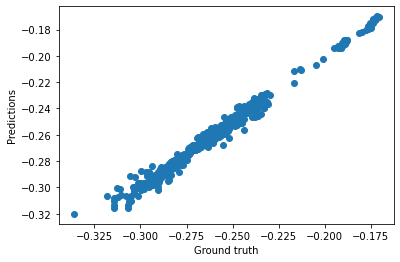

In [17]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [18]:
#%store model_rr_relative_support_x

In [19]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [20]:
# Save model
#joblib.dump(model_rr_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_support_x.sav")

### Predict RR foot -> y

In [25]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RR_support[:, :3], # motion command
               X_relative_footsteps_continuous_RR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RR_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_RR_support[:, 7]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_support_y = LinearRegression()

# Fit the model
model_rr_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9938422209557376
RMSE:  0.002452065045464206
The lowest error is:  3.37407771941467e-06
The highest error is:  0.018955014290974695
The avg. error is:  0.0016564000219011432


In [26]:
model_rr_relative_support_y.coef_

array([[ 0.02591294, -0.2001021 ,  0.05064151, -0.1620021 , -0.08637795,
        -0.11233887, -0.20289319, -0.00615133, -0.23651586, -0.16199965,
         1.31382763]])

In [27]:
model_rr_relative_support_y.intercept_

array([0.09683165])

Text(0, 0.5, 'Predictions')

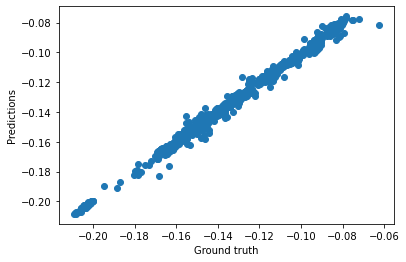

In [28]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [27]:
#%store model_rr_relative_support_y

In [28]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [22]:
# Save model
#joblib.dump(model_rr_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_support_y.sav")